<a href="https://colab.research.google.com/github/lplugof62/lorena_lugo_KC/blob/main/Taller5_caso_FannieMae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué factores son críticos para las solicitudes de hipotecas?

In [1]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os


%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduccion

**Contexto comercial** Una hipoteca es un préstamo para comprar una casa. Si se aprobará o no a un comprador potencial para una hipoteca, y cuánto dinero se aprueba, es de suprema ayuda para el mercado inmobiliario. Los requisitos para la aprobación de la solicitud de hipoteca cambian con el tiempo.

**Problema comercial** Usted es investigador en una firma de bienes raíces y recibió el siguiente correo electrónico de su jefe esta mañana:

<img src=files/boss_email.jpeg width="800">

**Contexto analítico.** *¿Qué información tengo? ¿Qué información necesito? ¿Tengo suficiente información?* Estas son preguntas cruciales que todos los científicos de datos deben hacerse antes de comenzar cualquier análisis. En este caso, mejorará sus habilidades para recopilar información y evaluar la suficiencia de la información. También practicará las habilidades que ha aprendido anteriormente para interpretar gráficos y figuras y comprender resúmenes de datos básicos. El conjunto de datos que utilizará son los datos de rendimiento de préstamos unifamiliares de Fannie Mae.

El caso está estructurado de la siguiente manera: usted (1) primero comprenderá y aclarará la cuestión de interés; (2) tener una idea de su conjunto de datos ideal, que es un paso crucial antes de recopilar información; (3) aprender a leer una descripción de datos; (4) determinar las limitaciones de su conjunto de datos y evaluar su suficiencia para responder la pregunta de interés; (5) explorar los datos a través de resúmenes de datos y gráficos; y (6) sacar conclusiones preliminares basadas en cuadros y figuras descriptivas.

<img src=files/mortgage-loan-application.jpg width="400">

## Comprender y aclarar la pregunta de interés

En un mundo ideal, el usuario empresarial siempre acudirá al científico de datos con una pregunta bien planteada y un conjunto de datos limpio. En realidad, este rara vez es el caso. Bucear directamente en la búsqueda o el análisis de datos sin tener preguntas claras y específicas para responder es un error común. Es por eso que el primer paso en la tubería del científico de datos es comprender y aclarar la pregunta de interés.

Recuerde la pregunta de interés:

> **¿Qué factores son críticos para una solicitud de préstamo hipotecario?**

Tenga en cuenta que esta pregunta no es lo suficientemente específica para que pueda recopilar información. Por ejemplo, ¿le preocupan a su jefe los factores que contribuyen a que el préstamo *se apruebe* o los factores que contribuyen al *desempeño del prestatario en el pago del préstamo*? ¿A su jefe le preocupan los préstamos en los EE. UU. O solo en un estado o región en particular?

### Pregunta:
Dedique de 2 a 3 minutos a pensar en una lista de preguntas que podría querer hacerle a su jefe.


Hay dos formas principales de aclarar una cuestión de interés. A veces es útil analizar casi todas las palabras de la pregunta y exigir **especificidad**. Por ejemplo, ¿qué significa "crítico" para su jefe? A veces es útil exigir **mensurabilidad**. Por ejemplo, ¿cómo mide su jefe el resultado de una "solicitud de préstamo hipotecario"? En el ejercicio a continuación, exploraremos varias preguntas que podría hacerle a su jefe y si son buenas preguntas o no.

### Ejercicio 1:

#### 1.1
Una de las preguntas que le hace a su jefe debe aclarar el *resultado* de interés. *¿Qué* parte del resultado de la solicitud de préstamo hipotecario le interesa? ¿Cuáles de los siguientes son ejemplos de resultados "buenos" (específicos y mensurables) de solicitudes de préstamos hipotecarios? Seleccione todas las que correspondan.

(a) Si el préstamo se aprueba o no;

(b) Si el préstamo se aprueba o no por el monto total solicitado inicialmente;

(c) El desempeño del prestatario en el reembolso del préstamo;

(d) Ninguna de estas opciones son ejemplos de resultados "buenos" (específicos y mensurables).


**Respuesta.** 

Creo que la b y la c podrían ser ejemplos de resultados específicos mensurables, ya que si se aprueba o no nos da una respuesta puntual y la mensurabilidad es medida por *cuánto* se le va a prestar de acuerdo al desempeño que tiene el prestatario para el pago de la hipoteca.



#### 1.2
Otra pregunta que le hace a su jefe necesita aclarar la *población* de interés. *¿De quién* las solicitudes de préstamos hipotecarios le interesan? ¿Cuáles de los siguientes son ejemplos de preguntas aclaratorias para las solicitudes de préstamos hipotecarios que podrían interesarle a su jefe?


(a) ¿Solicitudes de hipotecas de todo EE. UU. o solo de un estado o región en particular?

(b) ¿Solicitudes de hipotecas para viviendas unifamiliares o también viviendas multifamiliares?

(c) ¿Solicitudes de hipotecas de madres solteras o de todos los hogares?

(d) Todos los anteriores son buenos ejemplos de preguntas aclaratorias.


**Respuesta** 

Todas las preguntas anteriores podrían dar claridad a la población de interés.

#### 1.3
Por último, una pregunta para hacerle a su jefe, debe aclarar qué quieren decir con *factores*. Tu jefe puede tener algo específico en mente cuando dice esto y una buena manera de asegurarte de que entiendes lo que quieren decir es dar ejemplos de factores que estás pensando incorporar en tu análisis. Para cada una de las siguientes categorías de factores, dé un ejemplo de un factor específico que quizás desee medir. El primero ha sido hecho por ti.

1. Features demograficos del solicitante? **gender y edad**
2. Historia creditica del aplicante? **años con historia crediticia** y/o **comportamiento de pago mensual o anual**
3. Momento de la aplicación? **Ingresos del interesado en la hipoteca**
4. Features de la casa a ser comprada? **Costo de la casa**
5. ¿Estructura de amortización de la hipoteca que se solicita? **Duración del préstamo o la Tasa de interés**

**Respuesta.** 

## Conoce tu conjunto de datos ideal 

Ahora, suponga que ha realizado el ejercicio anterior con su jefe y ha aclarado que quiere responder la pregunta:

> **¿Qué factores de las solicitudes de hipotecas para viviendas unifamiliares en los EE. UU están más relacionados con el reembolso a tiempo de ese préstamo?**


Con nuestra pregunta en la mano, el siguiente paso lógico es *saber qué datos necesitamos para responder esa pregunta*; es decir, **recopilación de información**. A menudo, es útil imaginar su conjunto de datos ideal antes de buscar conjuntos de datos o sumergirse en el análisis de un conjunto de datos que se le ha proporcionado. Por ejemplo, si la pregunta de interés fuera simplemente "¿Cuál es la correlación entre el tamaño de la hipoteca (en USD) y el tiempo (en semanas) que se tarda en devolverlo?" entonces nuestro conjunto de datos ideal debería tener AL MENOS las siguientes columnas:

```
___________________________________
loan_amount_usd | weeks_to_pay_back
```

En general, queremos datos lo más granulares posible. Por ejemplo, si estamos interesados en las tendencias a lo largo del tiempo, entonces todo lo demás es igual, cuando comparamos los datos registrados a nivel diario versus a nivel mensual, preferiremos los datos a nivel diario. Si estamos interesados en las tendencias entre las personas, el conjunto de datos ideal tendrá muestras de una gran cantidad de personas diversas.

Sin embargo, hay dos advertencias importantes sobre "más es mejor":


1. Tener una muestra representativa es incluso más importante que tener una muestra grande. (Aprenderá más sobre cómo evaluar formalmente la representatividad en casos futuros). 
2. Recopilar más datos a menudo implica mucho más trabajo. A veces, puede ser necesario hacer concesiones en las que elija un conjunto de datos decente pero no ideal, en lugar de un conjunto de datos ideal para el que es muy difícil o imposible obtener todos los datos. (Aprenderá más sobre esto en casos futuros).


### Ejercicio 2:

#### 2.1
Vuelva a leer la pregunta aclarada de interés. En igualdad de condiciones, ¿preferiría tener un conjunto de datos sobre solicitudes de hipotecas unifamiliares que contenga:

(a) 10,000 solicitudes de todo Estados Unidos;

(b) 250.000 solicitudes de todo Estados Unidos;

(c) 500,000 solicitudes de solo California;

(d) todas las solicitudes de hipotecas multifamiliares.

**Respuesta.** 

La respuesta es la **B**, ya que 250,000 solicitudes puede ser una muestra representativa para un país tan grande como Estados Unidos. la falta de datos también puede ocasionar cesgos al momento de realizar análisis y de ser lo contrario (una gran cantidad de datos) el procesamiento y análisis de los datos puede ser más complicado. Sin embargo, existen formas de analizar cuál sería un muestra representativa de los datos.


#### 2.2
El conjunto de datos ideal definitivamente debe incluir el resultado de interés (p. Ej., Llámelo ``paid_back_on_time``) y tantos factores como sea posible que podrían influir en este resultado, como:

```
__________________________________________________________________________________________________________
borrower_credit_score | loan_amount_usd | zipcode | borrower_first_time_mortgage | ... | paid_back_on_time
```

Según la pregunta de interés aclarada, ¿cuántos valores puede asumir ``paid_back_on_time``?

(a) 1

(b) 2

(c) cualquier número entero no negativo

(d) cualquier número no negativo


**Respuesta.** 

**b**, puede asumir dos valores correspondientes a un booleano, **0** para **si** y **1** para **no**, que responden si se ha pagado a tiempo el crédito o no.



## Lea y comprenda la descripción de los datos

Para responder a la pregunta anterior, su jefe le aconseja que analice los datos de rendimiento de préstamos de Fannie Mae (conjunto de datos de crédito de rendimiento de préstamos unifamiliares del proveedor de préstamos hipotecarios Fannie Mae con datos de rendimiento hasta el cuarto trimestre de 2018). Puede descargar una versión de muestra y completa del conjunto de datos públicos[aquí](https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html).

Es una pérdida de tiempo analizar datos incorrectos, por lo que en casos futuros también aprenderá a evaluar la **calidad de los datos**. Si bien no profundizaremos mucho en esto aquí, comprender estos aspectos de los datos es crucial para la **limpieza de datos** adecuada. Los buenos conjuntos de datos, especialmente cuando están disponibles para uso público, tienen documentación que describe las variables en el conjunto de datos, cómo se recopilaron los datos, cuándo y cómo se actualizan, etc.


Pueden ver un PDF con la descripcion de los datos [aqui](https://github.com/Azaima-Asghar/Modeling-Probability-Of-Delinquency/blob/master/Dataset%20Documentation/FNMA_SF_Loan_Performance_File_layout.pdf) y un glosario de los terminos [aqui](https://github.com/Azaima-Asghar/Modeling-Probability-Of-Delinquency/blob/master/Dataset%20Documentation/FNMA_SF_Loan_Performance_Glossary.pdf).


<img src=files/boss_email.jpeg width="800">
<img src="files/acquisition_file_layout.png", width=500>

Muchos conjuntos de datos incluirán una identificación única para cada entrada. En este caso, cada entrada es un préstamo único, por lo que la primera columna del conjunto de datos es el `IDENTIFICADOR DEL PRÉSTAMO`, una identificación alfanumérica para cada préstamo. Observe lo que cada variable debe representar y qué variables pueden tener valores perdidos. Por ejemplo, ¿sabe cuál es la diferencia entre `PRÉSTAMO-VALOR` y `PRÉSTAMO-VALOR COMBINADO`? ¿Conoce los valores que puede asumir el `PROPÓSITO DEL PRÉSTAMO` y lo que se supone que representa?


Después de leer las descripciones de los datos, responda las preguntas a continuación.
### Ejercicio 3:
#### 3.1
Fannie Mae actualiza sus datos basándose en los esfuerzos continuos de aseguramiento de la calidad. ``TRUE`` o ``FALSE``?

**Respuesta.** 

si, ya que constantemente actualiza los datos de préstamos hipotecarios, proporciona datos de desempeño actualizados del trimestre anterior y además guarda el historial desde el año 1999 lo cual puede servir al momento de hacer alguna consulta. Datos más antigüos van perdiendo la necesidad de ser almacenados, precisamente por su calidad (datos que se vuelven inservibles).

#### 3.2
Si Fannie Mae actualiza sus datos, ¿cómo afectan las correcciones al conjunto de datos?

(a) Las correcciones solo pueden resultar en adiciones de préstamos hipotecarios.

(b) Las correcciones solo pueden resultar en remociones.

(c) Las correcciones pueden resultar en adiciones o eliminaciones.

(d) El sitio web no indica cómo las correcciones pueden afectar el conjunto de datos.

**Respuesta.** 

**C**. De acuerdo al sitio web, Fannie Mae realiza actualizaciones cada 3 meses, las correcciones pueden resultar en adiciones en caso de que hayan nuevos préstamos o en la modificación del estado de un préstamo. También puede resultar una eliminación de préstamos hipotecarios luego de una correción y es considerado como un factor de calidad de los datos.

#### 3.3
¿Qué hace Fannie Mae con sus conjuntos de datos cuando faltan datos o no están disponibles?

(a) Elimina toda la entrada de datos.

(b) Deja esos valores en blanco.

(c) Reemplaza esos valores con la palabra "faltante".

(d) El sitio web no indica cómo se manejan los valores faltantes o no disponibles.

**Respuesta.**

**B**. Fannie Mae deja los valores en blanco.

## Conozca las limitaciones de sus datos 

Ahora, consideremos los tipos de prestatarios incluidos en los datos. (En casos posteriores, aprenderá sobre la *población* de interés frente a la *muestra* particular disponible para usted). Una consideración importante en **suficiencia de información** es qué preguntas puede y qué no puede responder utilizando este conjunto de datos. Generalmente, no desea intentar responder preguntas sobre las que no tiene *ninguna* información. Por ejemplo, si alguien le pregunta cómo conducir una motocicleta y usted no tiene idea de cómo hacerlo, probablemente dirá: "No sé". Lo complicado en la ciencia de datos es que a veces tenemos *algo* pero no *toda* la información, y dependerá de usted determinar si tiene suficiente.


Por ahora, solo consideraremos los tipos de prestatarios y préstamos incluidos en este conjunto de datos. Si ciertos prestatarios y préstamos no están incluidos en el conjunto de datos, debemos ser más cautelosos al responder cualquier pregunta sobre ellos. Incluso para los prestatarios incluidos en los datos, debemos preguntarnos: *¿Qué tan representativa es la población de personas que contratan préstamos hipotecarios de Fannie Mae de la población en general que contratan hipotecas?*

Además, tenga en cuenta que este conjunto de datos es solo un subconjunto de las hipotecas que Fannie Mae afirma incluir:

> El ... conjunto de datos principal es un subconjunto de las hipotecas de tasa fija convencionales para viviendas unifamiliares de 30 años o menos, totalmente amortizables, con documentación completa

Entonces, incluso si los solicitantes de préstamos hipotecarios de Fannie Mae son representativos, ¿el * subconjunto * tomado para este conjunto de datos es representativo? Aprenderá más sobre métodos formales para evaluar la representatividad en casos futuros, pero es útil tener en cuenta algunas de estas preguntas a medida que recopila información. Lea la descripción de los datos de rendimiento de préstamos de Fannie Mae (puede encontrar preguntas frecuentes [aqui](https://github.com/Azaima-Asghar/Modeling-Probability-Of-Delinquency/blob/master/Dataset%20Documentation/FNMA_SF_Loan_Performance_terms_conditions.pdf)) 



## Explorando la acquision de datos

Ahora que entendemos nuestra pregunta de interés y hemos reunido algunos datos prometedores, comenzaremos a explorar los factores relacionados con la adquisición de hipotecas. Practicaremos las habilidades previamente desarrolladas en la lectura de tablas de resumen, cuadros y gráficos, y nos centraremos en los *adquisición de datos* proporcionados por Fannie Mae, que proporciona información a nivel de préstamo sobre hipotecas adquiridas.

Lea las estadísticas resumidas proporcionadas en este conjunto de datos. [Aqui](https://github.com/Azaima-Asghar/Modeling-Probability-Of-Delinquency/blob/master/Dataset%20Documentation/FNMA_SF_Loan_Performance_Stat_Summary_including_HARP.pdf).

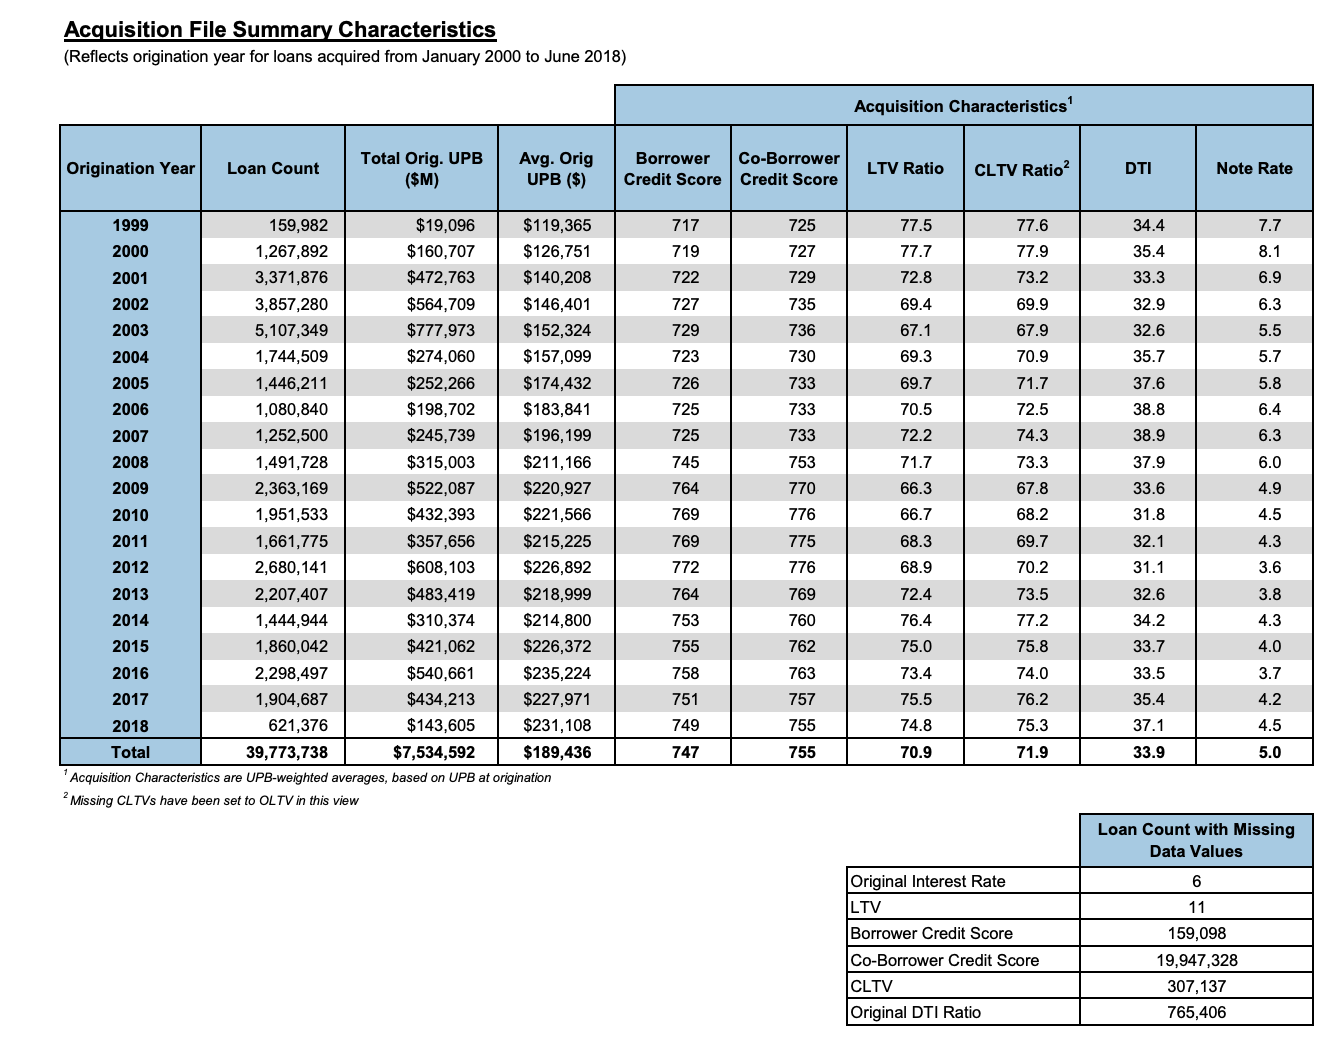
<img src=files/summary_statistics.png width="800">

¿Alguno de los gráficos y números apunta a información útil para responder la pregunta de interés? Utilice la tabla anterior para ayudarlo a responder las preguntas a continuación.

**Respuesta**
Si, efectivamente los datos contenidos en las gráficas y las tablas ayudan a aclarar la respuesta de interés. Lo que es el puntaje crediticio del prestatario y el co-prestatario influyen en la desición para realizar el prestamo, así como también es un factor el monto del préstamo. 

### Ejercicio 4:

#### 4.1
¿Qué tendencia, si alguna, observa en el puntaje crediticio promedio del prestatario a lo largo del tiempo?

(a) El puntaje crediticio promedio del prestatario está aumentando aproximadamente;

(b) La calificación crediticia promedio del prestatario está disminuyendo aproximadamente;

(c) La calificación crediticia promedio del prestatario permanece aproximadamente igual;

(re. Ninguna de las anteriores.

**Repuesta.** 
**a**,  Se observa una tendencia al aumento a pesar de ser muy ligera, sin embargo para saber si es un aumento significativo se tendría que realizar una prueba estadística de hipótesis.


---

Es probable que el puntaje crediticio promedio del prestatario sea un factor muy relacionado con si un préstamo se devuelve a tiempo. Dado que nuestra exploración de datos hasta ahora ha demostrado que parece haber una tendencia en el puntaje crediticio promedio del prestatario a lo largo del tiempo, debemos considerar enfocarnos en un período de tiempo más estrecho para identificar factores críticos para las solicitudes de hipotecas.


---

#### 4.2
Tenga en cuenta que el puntaje crediticio promedio del coprestatario tiende a ser más alto que el puntaje crediticio promedio del prestatario. ¿Es esto sorprendente? ¿Por qué o por qué no?

**Respuesta.** 

No es sorprendente, ya que lo que buscan los prestatarios es generar confianza a la entidad prestadora, por lo que buscan a una persona que tenga un buen o mejor puntaje crediticio y represente un respaldo seguro en caso de presentarse algún problema para el prestatario al momento de realizar la devolución del préstamo. 
---



De manera similar, el puntaje crediticio del coprestatario es probablemente un factor importante para determinar si una hipoteca se paga a tiempo. Tenga en cuenta que, si bien podemos adivinar la relación entre el puntaje crediticio del prestatario y el coprestatario, estas estadísticas resumidas no brindan suficientes detalles para determinar cómo se relacionan entre sí.

A continuación, nos centraremos en un período de tiempo más limitado y analizaremos los préstamos individuales frente a las estadísticas resumidas. Utilizando el código que se le proporcionó, cargaremos un conjunto de datos sobre adquisiciones de préstamos, realizaremos algunas parcelas y las interpretaremos. El conjunto de datos completo incluye 39 millones de solicitudes de préstamos hipotecarios. Aquí exploraremos un subconjunto del segundo trimestre de 2018. Ejecute el código en cada celda y responda las preguntas asociadas.

In [3]:
AcqData = pd.read_table('/Acquisition_2018Q2.txt', sep="|", header=None)

# What the names of the columns should be (provided in the data documentation)
acq_header_names = ["LOAN_IDENTIFIER",
                    "ORIGINATION_CHANNEL",
                    "SELLER_NAME",
                    "ORIGINAL_INTEREST_RATE",
                    "ORIGINAL_UPB",
                    "ORIGINAL_LOAN_TERM",
                    "ORIGINATION_DATE",
                    "FIRST_PAYMENT_DATE",
                    "ORIGINAL_LTV",
                    "ORIGINAL_COMB_LTV",
                    "NUMBER_OF_BORRWERS",
                    "ORIGINAL_DEBT_TO_INCOME_RATIO",
                    "BORROWER_CREDIT_SCORE_ORIG",
                    "FIRST_TIME_HOME_BUYER_IND",
                    "LOAN_PURPOSE",
                    "PROPERTY_TYPE",
                    "NUMBER_OF_UNITS",
                    "OCCUPANCY_TYPE",
                    "PROPERTY_STATE",
                    "ZIP_CODE_SHORT",
                    "PRIMARY_MORTGAGE_INSURANCE_PERCENT",
                    "PRODUCT_TYPE",
                    "COBORROWER_CREDIT_SCORE_ORIG",
                    "MORTGAGE_INSURANCE_TYPE",
                    "RELOCATION_MORTGAGE_IND"]
AcqData.columns = acq_header_names

AcqData.head()

,LOAN_IDENTIFIER,ORIGINATION_CHANNEL,SELLER_NAME,ORIGINAL_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,ORIGINAL_LTV,ORIGINAL_COMB_LTV,NUMBER_OF_BORRWERS,ORIGINAL_DEBT_TO_INCOME_RATIO,BORROWER_CREDIT_SCORE_ORIG,FIRST_TIME_HOME_BUYER_IND,LOAN_PURPOSE,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_TYPE,PROPERTY_STATE,ZIP_CODE_SHORT,PRIMARY_MORTGAGE_INSURANCE_PERCENT,PRODUCT_TYPE,COBORROWER_CREDIT_SCORE_ORIG,MORTGAGE_INSURANCE_TYPE,RELOCATION_MORTGAGE_IND
0,100000274788,C,PENNYMAC CORP.,4.250,271000,360,05/2018,07/2018,75,75,1,31.0,792.0,N,P,SF,1,P,IA,500,NaN,FRM,NaN,NaN,N
1,100001584442,C,"FLAGSTAR BANK, FSB",4.625,342000,360,03/2018,05/2018,53,91,1,48.0,717.0,N,R,PU,1,P,AZ,852,NaN,FRM,NaN,NaN,N
2,100002839546,C,OTHER,4.750,335000,360,03/2018,05/2018,77,77,1,38.0,684.0,N,P,PU,1,P,TX,750,NaN,FRM,NaN,NaN,N
3,100007968800,R,OTHER,4.500,279000,360,05/2018,07/2018,95,95,1,43.0,810.0,N,P,SF,1,P,AR,727,30.0,FRM,NaN,1.0,N
4,100014865042,R,FREEDOM MORTGAGE CORP.,4.125,344000,180,03/2018,05/2018,80,80,2,29.0,776.0,N,R,SF,1,P,NH,31,NaN,FRM,746.0,NaN,N


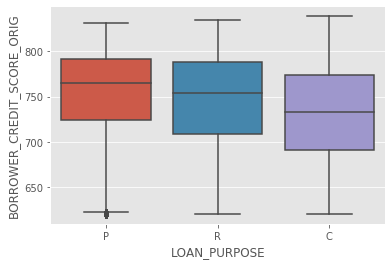

In [ ]:
sns.boxplot(x = 'LOAN_PURPOSE', y = 'BORROWER_CREDIT_SCORE_ORIG', data = AcqData)

Los códigos para fines de préstamo significan lo siguiente:

```
C = construction (build a new house)
P = purchase (buy an existing house)
R = refinance (switch to a different loan)
```

#### 4.3
Con base en el gráfico anterior, ¿cómo describiría la distribución de las calificaciones crediticias de los prestatarios para las solicitudes de préstamos con el propósito de **construcción**?

(a) La distribución parece aproximadamente simétrica;

(b) La distribución parece más o menos sesgada a la derecha;

(c) La distribución parece más o menos sesgada a la izquierda;

(d) No se puede deducir de la trama proporcionada.

**Respuesta.** 



#### 4.4
Con base en el gráfico anterior, ¿cómo describiría la distribución de las calificaciones crediticias del prestatario para las solicitudes de préstamos con el propósito de construcción versus compra? Seleccione todas las que correspondan.

(a) Las distribuciones tienen el mismo aspecto;

(b) Las calificaciones crediticias del prestatario parecen significativamente más altas para las viviendas en venta;

(c) Las calificaciones crediticias del prestatario parecen significativamente más bajas para las viviendas en venta;

(d) No se puede deducir de la trama proporcionada.

**Respuesta.** 

Recuerde anteriormente que la tabla de resúmenes de datos indicaba que el puntaje crediticio promedio del coprestatario era más alto que el puntaje crediticio promedio del prestatario. Nos sumergiremos en esta información a nivel de préstamo en lugar de estadísticas resumidas para ver si las calificaciones crediticias de los coprestatarios son un factor importante a considerar para el pago de la hipoteca.


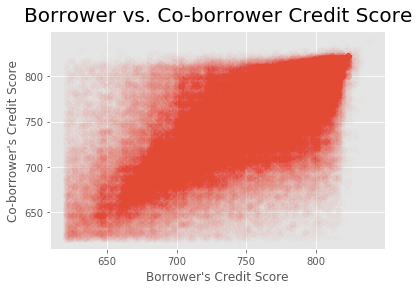

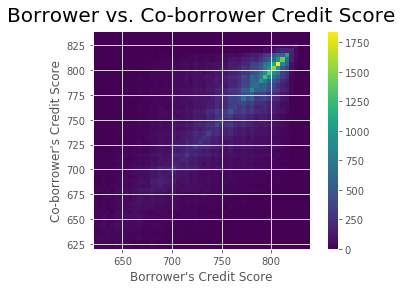

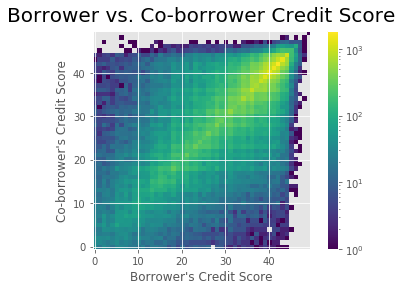

In [ ]:
from matplotlib.colors import LogNorm

x = AcqData['BORROWER_CREDIT_SCORE_ORIG']
y = AcqData['COBORROWER_CREDIT_SCORE_ORIG']

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

y = y[~np.isnan(x)]
x = x[~np.isnan(x)]

plt.scatter(x,y,alpha=0.01)
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

plt.clf()
plt.imshow(heatmap.T, norm=LogNorm(), origin='lower')
plt.colorbar()
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

Tenga en cuenta que los tres gráficos muestran los mismos datos exactos de diferentes maneras. Dado que hay tantos puntos de datos, ajustar la opacidad de sus puntos o aplicar degradados puede hacer que sean más fáciles de ver. A partir de estos gráficos, parece que el puntaje crediticio del prestatario y el puntaje crediticio del coprestatario están generalmente muy relacionados: cuando el puntaje crediticio del prestatario es alto, el del coprestatario es alto; cuando el puntaje crediticio del prestatario es bajo, el del coprestatario es bajo.

**¿Qué hemos aprendido hasta ahora acerca de los factores importantes para la adquisición de hipotecas?**

Sabemos por el conocimiento del dominio que los puntajes de crédito son probablemente factores importantes para determinar el pago de la hipoteca. Por lo tanto, podemos pensar en la calificación crediticia de un prestatario como un indicador de la probabilidad de reembolso de la hipoteca. Según lo que hemos visto en los datos de adquisición, antes incluso de analizar el rendimiento de la hipoteca, sabemos que los puntajes crediticios no parecen diferir sustancialmente en función del propósito del préstamo, por lo que quizás este no sea un factor importante. Además, cuando analizamos datos más detallados, vimos que los puntajes crediticios de los coprestatarios no siempre son más altos que los puntajes crediticios de los prestatarios, como sospechábamos inicialmente. Esto sugiere que el puntaje crediticio del coprestatario puede ser un factor importante a considerar en el pago de la hipoteca, independientemente del puntaje crediticio del prestatario.

## Sacar conclusiones de los datos de rendimiento

Ahora, usemos algunos de los factores que exploramos para la adquisición de hipotecas para analizar el desempeño de las hipotecas. Continuaremos practicando la lectura de gráficos, pero ahora nos centraremos en los *datos de desempeño* proporcionados por Fannie Mae, que brindan información a nivel de préstamo sobre el pago de hipotecas. Evaluaremos la suficiencia de información para proponer factores iniciales de interés para nuestro jefe que estén relacionados con el pago de una hipoteca a tiempo.

Con el código que se le proporcionó, cargaremos un conjunto de datos sobre el rendimiento del préstamo, realizaremos algunos gráficos y los interpretaremos. Aquí continuaremos explorando un subconjunto del segundo trimestre de 2018. Ejecute el código en cada celda y responda las preguntas asociadas.

In [ ]:
PerfData = pd.read_table('files/Performance_2018Q2.txt', sep="|", header=None)

# What the names of the columns should be (provided in the data documentation)
perf_header_names = ["LOAN_IDENTIFIER",
                     "MONTHLY_REPORTING",
                     "SERVICER_NAME",
                     "CURRENT_INTEREST_RATE",
                     "CURRENT_ACTUAL_UPB",
                     "LOAN_AGE",
                     "REMAINING_MONTHS_TO_LEGAL_MATURITY",
                     "ADJUSTED_MONTHS_TO_MATURITY",
                     "MATURITY_DATE",
                     "METROPOLITAN_STATISTICAL_AREA",
                     "CURRENT_LOAN_DELINQUENCY_STATUS",
                     "MODIFICATION_FLAG",
                     "ZERO BALANCE_CODE",
                     "ZERO BALANCE_EFFECTIVE",
                     "LAST_PAID_INSTALLMENT",
                     "FORECLOSURE_DATE",
                     "DISPOSITION_DATE",
                     "FORECLOSURE_COSTS",
                     "PROPERTY PRESERVATION_AND_REPAIR_COSTS",
                     "ASSET_RECOVERY_COSTS",
                     "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                     "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY",
                     "NET_SALE_PROCEEDS",
                     "CREDIT_ENHANCEMENT_PROCEEDS",
                     "REPURCHASE_MAKE_WHOLE_PROCEEDS",
                     "OTHER_FORECLOSURE_PROCEEDS",
                     "NON_INTEREST_BEARING_UPB",
                     "PRINCIPAL_FORGIVENESS_AMOUNT",
                     "REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG",
                     "FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT",
                     "SERVICING_ACTIVITY_INDICATOR"]
  
PerfData.columns = perf_header_names

PerfData.head()

,LOAN_IDENTIFIER,MONTHLY_REPORTING,SERVICER_NAME,CURRENT_INTEREST_RATE,CURRENT_ACTUAL_UPB,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,ADJUSTED_MONTHS_TO_MATURITY,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,...,ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY,NET_SALE_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,REPURCHASE_MAKE_WHOLE_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,NON_INTEREST_BEARING_UPB,PRINCIPAL_FORGIVENESS_AMOUNT,REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG,FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT,SERVICING_ACTIVITY_INDICATOR
0,100000274788,06/01/2018,PENNYMAC CORP.,4.25,NaN,0,360,360.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,100000274788,07/01/2018,NaN,4.25,NaN,1,359,359.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,100000274788,08/01/2018,NaN,4.25,NaN,2,358,357.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,100000274788,09/01/2018,NaN,4.25,NaN,3,357,356.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,100000274788,10/01/2018,NaN,4.25,NaN,4,356,354.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


Above you can see the first five rows of the dataset we are investigating.

In [ ]:
# This will take a few seconds to run
print(sum(PerfData['ADJUSTED_MONTHS_TO_MATURITY'] == 0))

18173


La línea anterior nos muestra que hay más de 18,000 préstamos en este conjunto de datos del segundo trimestre de 2018, donde los meses ajustados hasta el vencimiento son cero. A los efectos de este caso, consideraremos que estos préstamos son aquellos en los que el pago no se entregó a tiempo. En otras palabras, trataremos esto como el resultado de interés. (`True` significa que el prestamo fue pagado a tiempo, `False` indica lo contrario).

In [ ]:
PerfData['LOAN_REPAID_ON_TIME'] = PerfData['ADJUSTED_MONTHS_TO_MATURITY'] != 0

### Ejercicio 5:
Recuerde que estos son los factores que creemos que están relacionados con el pago de la hipoteca según el conjunto de datos de adquisición y el conocimiento del dominio:
1. puntaje crediticio del prestatario
2. puntaje crediticio del coprestatario (*a veces muy relacionado con el puntaje crediticio del prestatario, a veces no*)
3. propósito del préstamo (*tal vez; aunque no está claramente relacionado con el puntaje crediticio, aún puede ser importante*)

En las siguientes tres preguntas, evaluará cómo la tasa de interés actual, el UPB (saldo principal impago) actual y la antigüedad del préstamo se relacionan con si el préstamo se paga a tiempo o no.

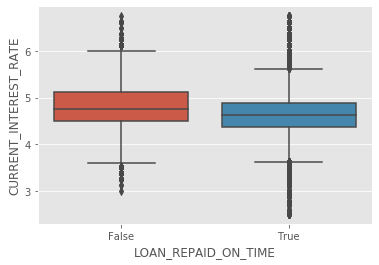

In [ ]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'CURRENT_INTEREST_RATE', data = PerfData)
plt.show()

#### 5.1
Con base en el gráfico anterior, ¿cómo describiría la diferencia entre la distribución de las tasas de interés actuales para las hipotecas reembolsadas a tiempo y la de las hipotecas no reembolsadas a tiempo?

(a) Las hipotecas reembolsadas a tiempo tienden a tener tipos de interés significativamente más bajos;

(b) Las hipotecas reembolsadas a tiempo tienden a tener tipos de interés ligeramente más bajos;

(c) Las hipotecas reembolsadas a tiempo tienden a tener las mismas tasas de interés, con algunos valores atípicos significativamente más bajos;

(d) No se puede deducir de la informacion dada.

**Respuesta.**

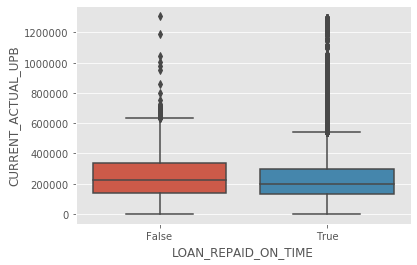

In [ ]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'CURRENT_ACTUAL_UPB', data = PerfData)
plt.show()

#### 5.2
Con base en el gráfico anterior, ¿cómo describiría la diferencia entre la distribución del UPB actual actual para las hipotecas reembolsadas a tiempo y la de las hipotecas no reembolsadas a tiempo?

(a) Las hipotecas reembolsadas a tiempo tienden a tener UBP significativamente más altas;

(b) Las hipotecas reembolsadas a tiempo tienden a tener UBP levemente más altas;

(c) Las hipotecas reembolsadas a tiempo tienden a tener las mismas UBP;

(d) No se puede deducir de la informacion dada.

**Respuesta.**

*Nota: algo inusual acerca de este gráfico que requiere una mayor investigación de los datos es que parece que hay algunos préstamos identificados como no reembolsados a tiempo, pero el saldo del principal no pagado es cero.*

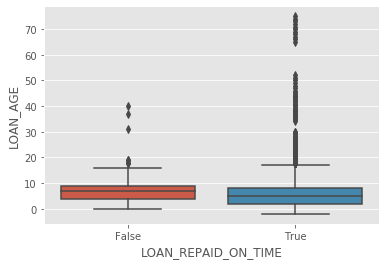

In [ ]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'LOAN_AGE', data = PerfData)
plt.show()

#### 5.3
Con base en el gráfico anterior, ¿cómo describiría la diferencia entre las distribuciones de la antigüedad de los préstamos para la hipoteca pagada a tiempo y no?

(a) Las hipotecas reembolsadas a tiempo son significativamente más antiguas;

(b) Las hipotecas reembolsadas a tiempo son un poco más antiguas;

(c) Las hipotecas reembolsadas a tiempo tienden a tener la misma antigüedad, con algunos valores atípicos significativamente más antiguos;

(d) No se puede deducir de la informacion dada.

**Respuesta** 

## Conclusiones

Trabajamos con los datos de rendimiento de préstamos para viviendas unifamiliares de Fannie Mae para comenzar a explorar qué factores de las solicitudes de hipotecas unifamiliares en los EE. UU. Están más relacionados con los préstamos que se devuelven a tiempo. Basándonos en el conocimiento del dominio y la información en los conjuntos de datos de adquisición y desempeño proporcionados por Fannie Mae, le informaremos a nuestro jefe que los factores relacionados con el desempeño hipotecario parecen ser complicados. En nuestra exploración univariante, no pudimos identificar diferencias obvias entre la tasa de interés actual, el UPB actual actual (saldo de capital impago) y la antigüedad del préstamo para hipotecas reembolsadas a tiempo vs. En nuestra exploración de la relación entre los puntajes crediticios del prestatario y del coprestatario, vimos una fuerte tendencia positiva pero también una gran variabilidad.

Además, vimos que los datos proporcionados por Fannie Mae no son suficientes para responder la pregunta de interés, ya que faltan muchos valores y solo se recopilaron ~30 factores que podrían analizarse para determinar su relación con el desempeño del préstamo.

## Para llevar

En este caso, desarrolló sus habilidades para recopilar información y evaluar la suficiencia de la información. Fundamentalmente, aprendimos que antes de hacer CUALQUIER análisis de los datos, debemos:

1. Comprender y aclarar la cuestión de interés. En entornos comerciales prácticos, las preguntas a menudo se plantean de manera vaga y deben ser más específicas para que sean útiles.
2. Saber identificar cómo debería ser nuestro conjunto de datos ideal antes de invertir tiempo y esfuerzo valiosos en la búsqueda de nuevos conjuntos de datos o analizar un conjunto de datos existente.
3. Identificar las capacidades y limitaciones de nuestros conjuntos de datos, de modo que sepamos lo que podemos y no podemos concluir y actuar en un entorno empresarial una vez que terminemos nuestro análisis.

También aprendimos que hay pasos adicionales en el proceso de ciencia de datos que exploraremos en casos futuros, como la limpieza de datos, la generación de gráficos y cálculos formales para evaluar la suficiencia del tamaño de la muestra, probar hipótesis y predecir resultados de interés.